In [1]:
import glob
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from matplotlib import cm

## Figure 1: Simple some vs many

In [3]:
files_1 = glob.glob("data/T1R5/*.txt")
files_2 = glob.glob("data/T1R20/*.txt")

In [4]:
data_1 = []
for file in files_1:
    data_1.append(np.loadtxt(file))

data_2 = []
for file in files_2:
    data_2.append(np.loadtxt(file))

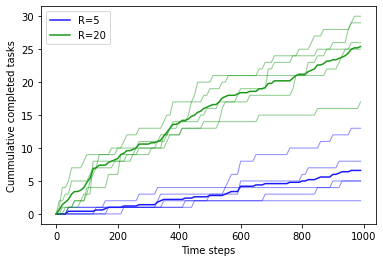

In [5]:
for sim in data_1:
    plt.plot(sim[:, 0], sim[:, 1], color=(0.1, 0.1, 1, 0.5), linewidth=1)
sim_mean = np.mean(np.array(data_1), axis=0)
plt.plot(data_1[0][:, 0], sim_mean[:, 1], color=(0.1, 0.1, 1, 1), label="R=5")

for sim in data_2:
    plt.plot(sim[:, 0], sim[:, 1], color=(0.1, 0.6, 0.1, 0.5), linewidth=1)
sim_mean = np.mean(np.array(data_2), axis=0)
plt.plot(data_2[0][:, 0], sim_mean[:, 1], color=(0.1, 0.6, 0.1, 1), label="R=20")

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("Cummulative completed tasks")
# plt.show()
plt.savefig("some_vs_many.png", dpi=200)

## Figure 2: Completed tasks as a function of $n_R$

In [6]:
dirs_t1 = glob.glob("data/T1R??") + glob.glob("data/T1R?")
dirs_t2 = glob.glob("data/T2R??") + glob.glob("data/T2R?")
dirs_t10 = glob.glob("data/T10R??") + glob.glob("data/T10R?")
dirs_t20 = glob.glob("data/T20R??") + glob.glob("data/T20R?")

In [7]:
def get_data_from_folder(folder_list, prefix):
    folder_dict = {}
    for folder in folder_list:
        data = []
        files = glob.glob(folder + "/*.txt")
        for file in files:
            data.append(np.loadtxt(file)[:, 1])
        folder_dict[int(folder.lstrip("data/" + prefix).lstrip("R"))] = data
    return folder_dict

In [8]:
t1_data = get_data_from_folder(dirs_t1, "T1")
t2_data = get_data_from_folder(dirs_t2, "T2")
t10_data = get_data_from_folder(dirs_t10, "T10")
t20_data = get_data_from_folder(dirs_t20, "T20")

In [9]:
def extract_mean_std(data_dict):
    mean_std_dict = {}
    for key in data_dict:
        last_obs = np.array(data_dict[key])[:, -1]
        mean_std_dict[key] = [
            np.mean(last_obs),
            np.std(last_obs)
        ]
    return mean_std_dict

In [10]:
t1_mean_std_dict = extract_mean_std(t1_data)
t2_mean_std_dict = extract_mean_std(t2_data)
t10_mean_std_dict = extract_mean_std(t10_data)
t20_mean_std_dict = extract_mean_std(t20_data)

In [11]:
low_mean_std = {
    1 : t1_mean_std_dict,
    2 : t2_mean_std_dict,
}
high_mean_std = {
    10 : t10_mean_std_dict,
    20 : t20_mean_std_dict
}

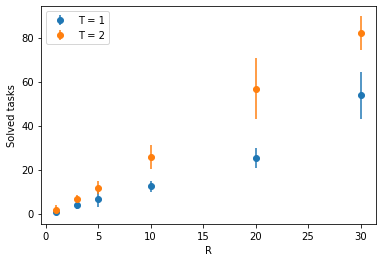

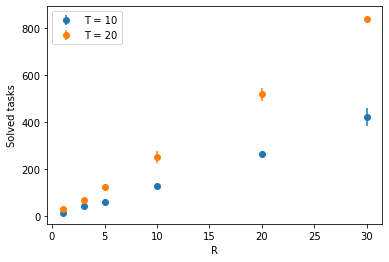

In [12]:
plt.figure()
for T in low_mean_std:
    Rs = []
    means = []
    stds = []
    for R in low_mean_std[T]:
        Rs.append(R)
        means.append(low_mean_std[T][R][0])
        stds.append(low_mean_std[T][R][1])
    plt.errorbar(Rs, means, yerr=stds, fmt="o", label=f"T = {T}")

plt.xlabel("R")
plt.ylabel("Solved tasks")
plt.legend()

plt.savefig("low_T_tasks_vs_R.png", dpi=200)

plt.figure()

for T in high_mean_std:
    Rs = []
    means = []
    stds = []
    for R in high_mean_std[T]:
        Rs.append(R)
        means.append(high_mean_std[T][R][0])
        stds.append(high_mean_std[T][R][1])
    plt.errorbar(Rs, means, yerr=stds, fmt="o", label=f"T = {T}")

plt.xlabel("R")
plt.ylabel("Solved tasks")
plt.legend()
# plt.show()
plt.savefig("high_T_tasks_vs_R.png", dpi=200)

## Figure 3: Tasks as a function of $n_R$ when $T_c=3$

In [13]:
dirs_t1_tc3 = glob.glob("data/T1*Tc?")
dirs_t2_tc3 = glob.glob("data/T2*Tc?")

In [14]:
dirs_t1_tc3

['data/T1R30Tc3',
 'data/T1R5Tc3',
 'data/T1R20Tc3',
 'data/T1R10Tc3',
 'data/T1R3Tc3']

In [15]:
def get_data_from_folder(folder_list, prefix):
    folder_dict = {}
    for folder in folder_list:
        data = []
        files = glob.glob(folder + "/*.txt")
        for file in files:
            data.append(np.loadtxt(file)[:, 1])
        key_string = folder.lstrip("data/" + prefix).lstrip("R")[:-3]
        # print(key_string)
        try:
            folder_dict[int(key_string)] = data
        except:
            continue
    return folder_dict

In [16]:
t1_data_tc3 = get_data_from_folder(dirs_t1_tc3, "T1")
t2_data_tc3 = get_data_from_folder(dirs_t2_tc3, "T2")

In [17]:
t1_mean_std_tc3 = extract_mean_std(t1_data_tc3)
t2_mean_std_tc3 = extract_mean_std(t2_data_tc3)

In [18]:
mean_std_tc3 = {
    1: t1_mean_std_tc3,
    2: t2_mean_std_tc3
}

In [19]:
mean_std_tc3

{1: {30: [13.2, 2.7856776554368237],
  5: [1.6, 0.4898979485566356],
  20: [6.8, 0.7483314773547882],
  10: [3.0, 0.8944271909999159],
  3: [0.8, 0.4]},
 2: {7: [3.8, 1.6],
  20: [13.2, 2.6381811916545836],
  10: [6.6, 1.624807680927192],
  5: [0.6666666666666666, 0.74535599249993]}}

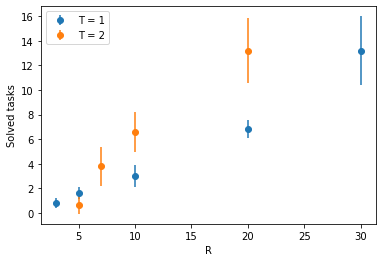

In [20]:
for T in mean_std_tc3:
    Rs = []
    means = []
    stds = []
    for R in mean_std_tc3[T]:
        Rs.append(R)
        means.append(mean_std_tc3[T][R][0])
        stds.append(mean_std_tc3[T][R][1])
    plt.errorbar(Rs, means, yerr=stds, fmt="o", label=f"T = {T}")
    
plt.xlabel("R")
plt.ylabel("Solved tasks")
plt.legend(loc="upper left")
# plt.show()
plt.savefig("Tc3_tasks_vs_R.png")

## Improvement with call-out ($T_c$)

In [21]:
dirs_t2_tc3_nocall = ['data/T2R20Tc3', 'data/T2R10Tc3', 'data/T2R5Tc3']
dirs_t2_tc3_call = [
    'data/T2R20Tc3Call250',
    'data/T2R10Tc3Call250',
    'data/T2R5Tc3Call250'
]

In [22]:
def get_data_from_folder(folder_list, prefix):
    folder_dict = {}
    for folder in folder_list:
        data = []
        files = glob.glob(folder + "/*.txt")
        for file in files:
            data.append(np.loadtxt(file)[:, 1])
        key_string = folder.lstrip("data/" + prefix).lstrip("R")
        try:
            key_string = key_string.rstrip("Call250")
        except:
            continue
        key_string = key_string[:-3]
        # print(key_string)
        
        folder_dict[int(key_string)] = data
            
    return folder_dict

In [23]:
t2_data_tc3_call = get_data_from_folder(dirs_t2_tc3_call, "T2")
t2_data_tc3_nocall = get_data_from_folder(dirs_t2_tc3_nocall, "T2")

In [24]:
t2_mean_std_tc3_call = extract_mean_std(t2_data_tc3_call)
t2_mean_std_tc3_nocall = extract_mean_std(t2_data_tc3_nocall)

In [25]:
mean_std_dict_call = {
    "Call": t2_mean_std_tc3_call,
    "No Call": t2_mean_std_tc3_nocall
}

In [26]:
mean_std_dict_call

{'Call': {20: [34.8, 4.664761515876241],
  10: [13.4, 2.65329983228432],
  5: [5.6, 1.0198039027185568]},
 'No Call': {20: [13.2, 2.6381811916545836],
  10: [6.6, 1.624807680927192],
  5: [0.6666666666666666, 0.74535599249993]}}

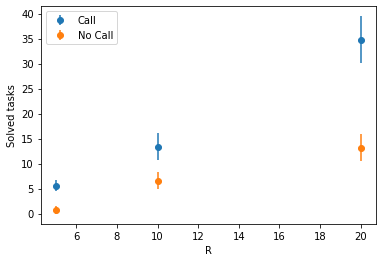

In [27]:
for guy in mean_std_dict_call:
    Rs = []
    means = []
    stds = []
    for R in mean_std_dict_call[guy]:
        Rs.append(R)
        means.append(mean_std_dict_call[guy][R][0])
        stds.append(mean_std_dict_call[guy][R][1])
    plt.errorbar(Rs, means, yerr=stds, fmt="o", label=f"{guy}")
    
plt.xlabel("R")
plt.ylabel("Solved tasks")
plt.legend(loc="upper left")
plt.savefig("call_vs_no_call.png", dpi=200)
#plt.show()

## Improvement with louder call

In [28]:
call_files_1 = glob.glob("data/T2R5Tc3Call250/*.txt")
call_files_2 = glob.glob("data/T2R5Tc3Call500/*.txt")
call_files_3 = glob.glob("data/T2R5Tc3Call1000/*.txt")

In [29]:
call_data_1 = []
for file in call_files_1:
    call_data_1.append(np.loadtxt(file))

call_data_2 = []
for file in call_files_2:
    call_data_2.append(np.loadtxt(file))

call_data_3 = []
for file in call_files_3:
    call_data_3.append(np.loadtxt(file))

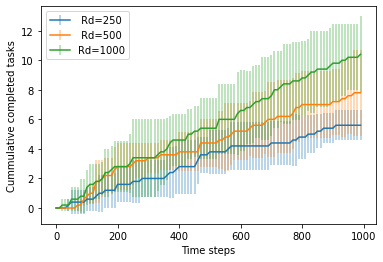

In [30]:
fig, ax = plt.subplots()
sim_mean = np.mean(np.array(call_data_1), axis=0)
sim_std = np.std(np.array(call_data_1), axis=0)
markers, caps, bars = plt.errorbar(call_data_2[0][:, 0], sim_mean[:, 1], yerr=sim_std[:, 1], label=" Rd=250")
[bar.set_alpha(0.4) for bar in bars]

sim_mean = np.mean(np.array(call_data_2), axis=0)
sim_std = np.std(np.array(call_data_2), axis=0)
markers, caps, bars = plt.errorbar(call_data_2[0][:, 0], sim_mean[:, 1], yerr=sim_std[:, 1], label=" Rd=500")
[bar.set_alpha(0.4) for bar in bars]

sim_mean = np.mean(np.array(call_data_3), axis=0)
sim_std = np.std(np.array(call_data_3), axis=0)
markers, caps, bars = plt.errorbar(call_data_2[0][:, 0], sim_mean[:, 1], yerr=sim_std[:, 1], label="Rd=1000")
[bar.set_alpha(0.4) for bar in bars]

plt.legend()
plt.xlabel("Time steps")
plt.ylabel("Cummulative completed tasks")
plt.savefig("louder_call.png", dpi=200)
# plt.show()